# Predicting Customer Churn at Beta Bank

**Project Description:**

Beta Bank is experiencing customer churn, with customers leaving the bank at a concerning rate. It is more cost-effective to retain existing customers than to acquire new ones. We have historical data on customer behavior and contract terminations.

**Analysis Goal:**

The goal of this project is to build a predictive model that can accurately identify customers who are likely to churn (leave the bank) in the near future. This model will enable Beta Bank to proactively take steps to retain these customers. We aim to achieve an F1 score of at least 0.59 on the test set. Additionally, we will evaluate the model's performance using the AUC-ROC metric and compare it with the F1 score.

In [1]:
# Importing the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, accuracy_score, roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Loading the data
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
# Initial exploration
print("Data shape:", data.shape)
print("\nData info:")
print(data.info())
print("\nFirst 5 rows:")
display(data.head()) #display here
print("\nDescriptive statistics:")
display(data.describe()) #display here
print("\nUnique values in categorical columns:")
for col in data.select_dtypes(include='object').columns:
    print(f"\n{col}: {data[col].unique()}")

print("\nTarget variable distribution:")
display(data['Exited'].value_counts(normalize=True))

Data shape: (10000, 14)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None

First 5 rows:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0



Descriptive statistics:


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000



Unique values in categorical columns:

Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']

Geography: ['France' 'Spain' 'Germany']

Gender: ['Female' 'Male']

Target variable distribution:


0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [4]:
# Reviewer's code

display(data.head(3))

data.tail(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [5]:
# Checking for duplicates
print("Number of duplicate rows:", data.duplicated().sum())

# Removing duplicates if any
data = data.drop_duplicates()
print("Data shape after removing duplicates:", data.shape)

Number of duplicate rows: 0
Data shape after removing duplicates: (10000, 14)


In [6]:
# Imputing missing values in 'Tenure' with the median
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())

# Verifying no missing values remain after imputation
print("\nNumber of missing values in Tenure:", data['Tenure'].isnull().sum())

# Displaying the head of the processed data.
print("\nHead of processed data:")
display(data.head())


Number of missing values in Tenure: 0

Head of processed data:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [7]:
# Dropping unnecessary columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

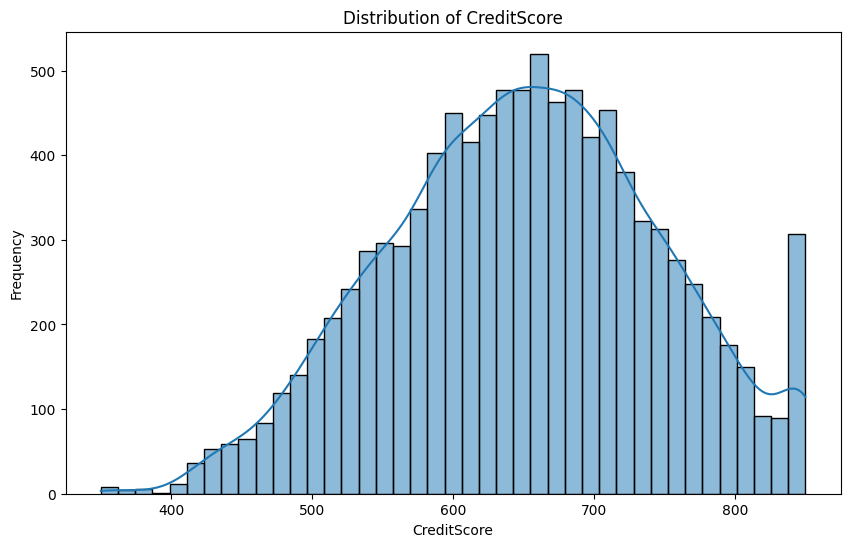

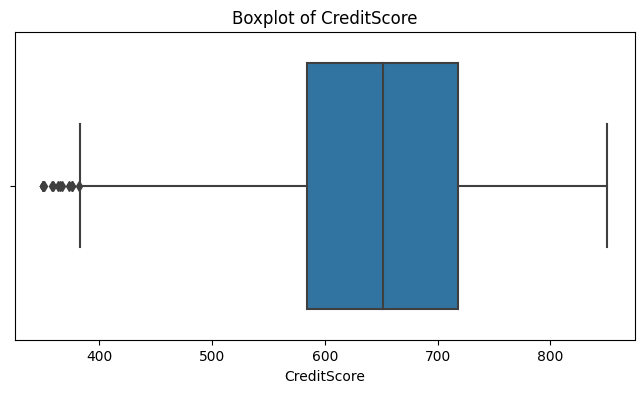

Observations for CreditScore:
- CreditScore appears to be relatively normally distributed (skewness: -0.07).
- Potential outliers detected.
----------------------------------------


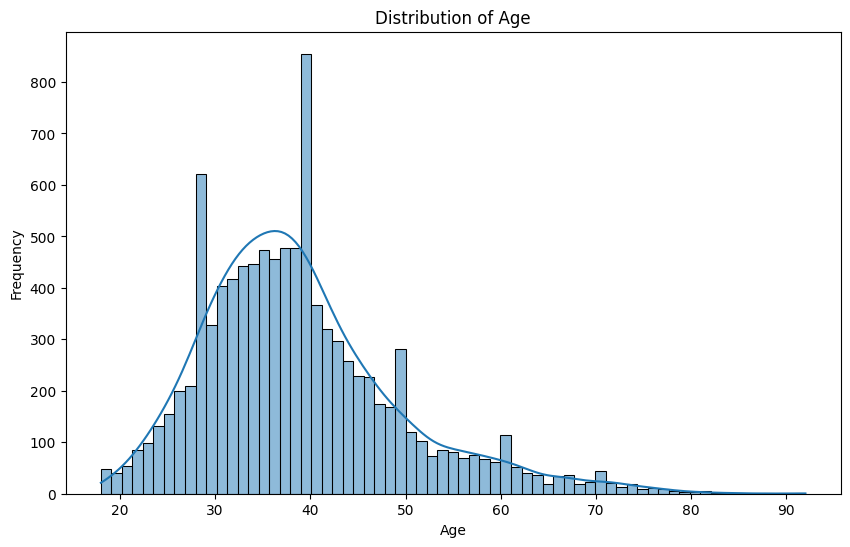

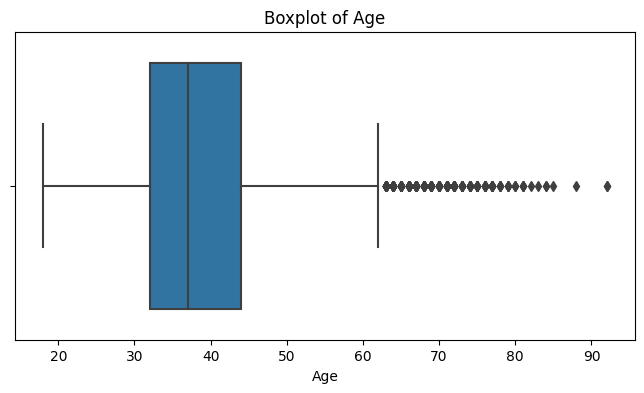

Observations for Age:
- Age is skewed (skewness: 1.01).
- Potential outliers detected.
----------------------------------------


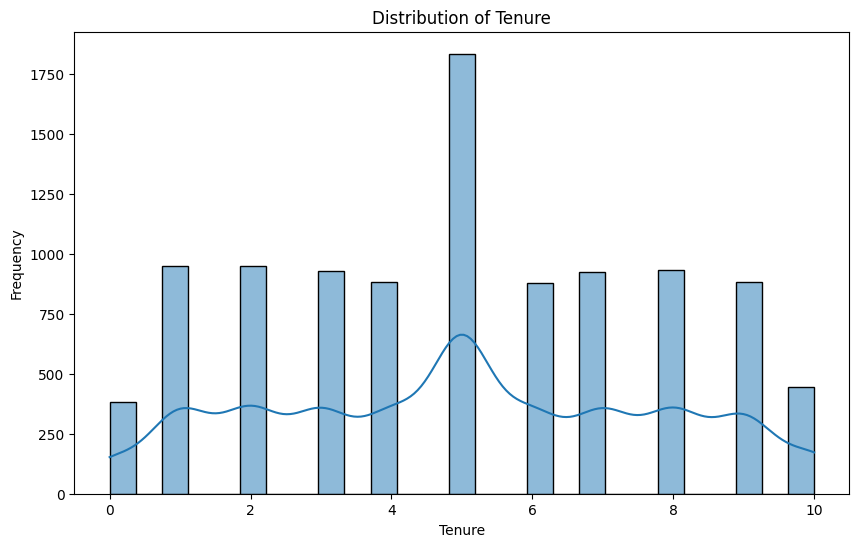

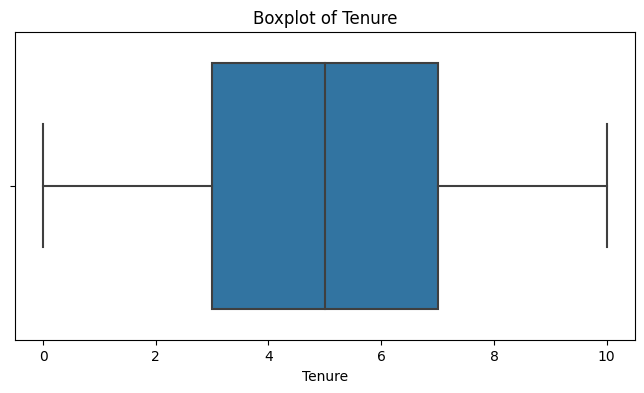

Observations for Tenure:
- Tenure appears to be relatively normally distributed (skewness: 0.02).
- No obvious outliers detected.
----------------------------------------


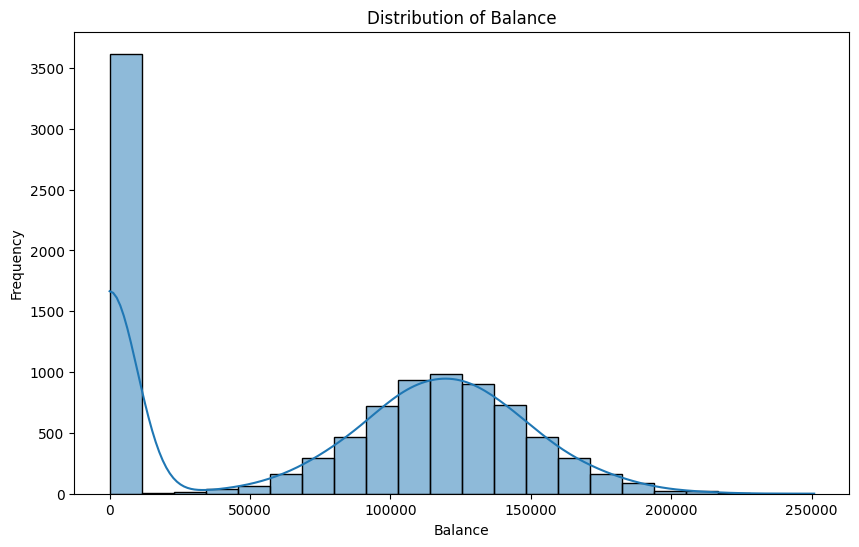

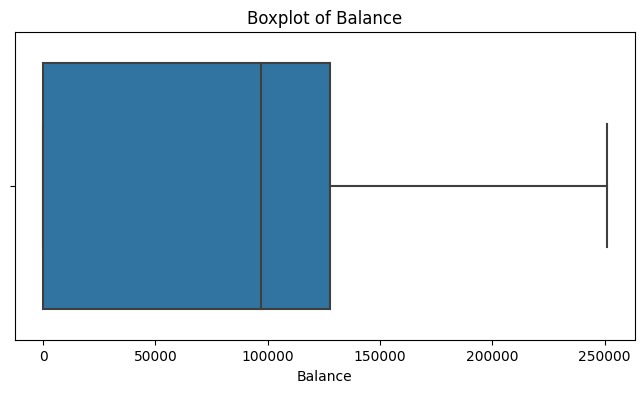

Observations for Balance:
- Balance appears to be relatively normally distributed (skewness: -0.14).
- Potential outliers detected.
----------------------------------------


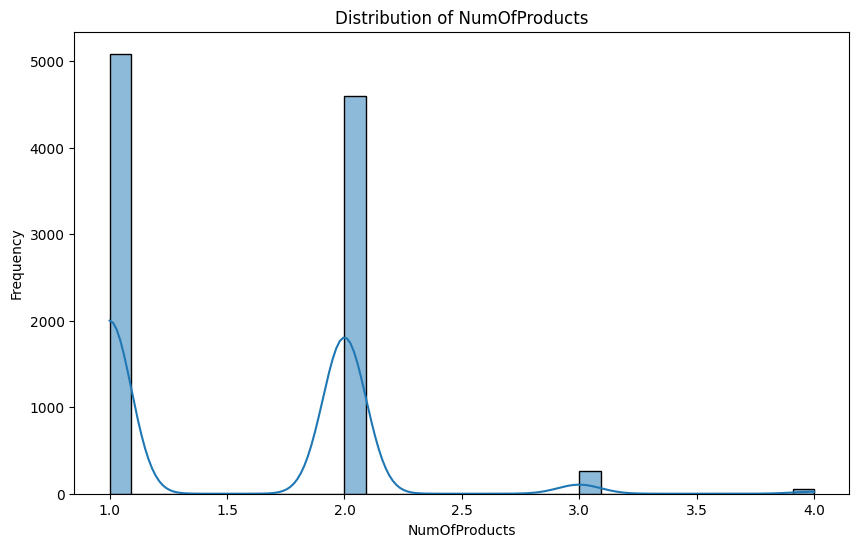

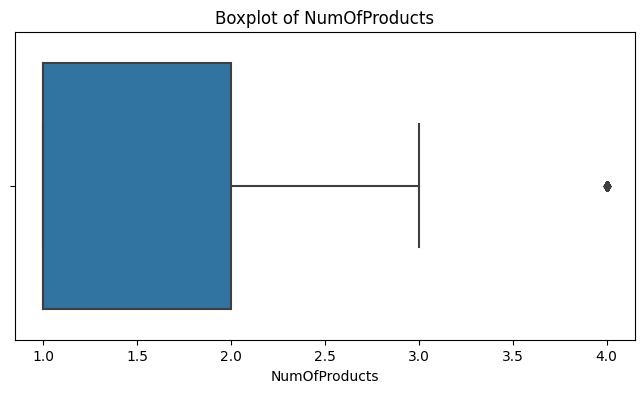

Observations for NumOfProducts:
- NumOfProducts is skewed (skewness: 0.75).
- Potential outliers detected.
----------------------------------------


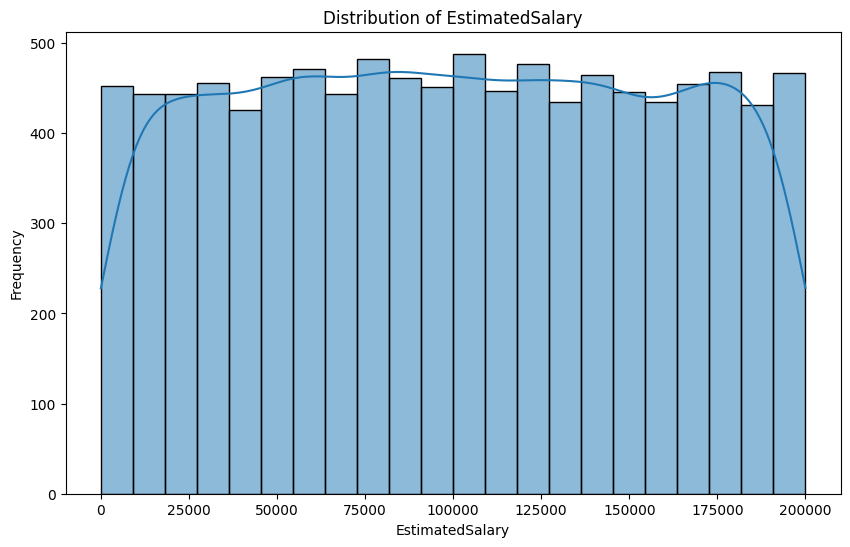

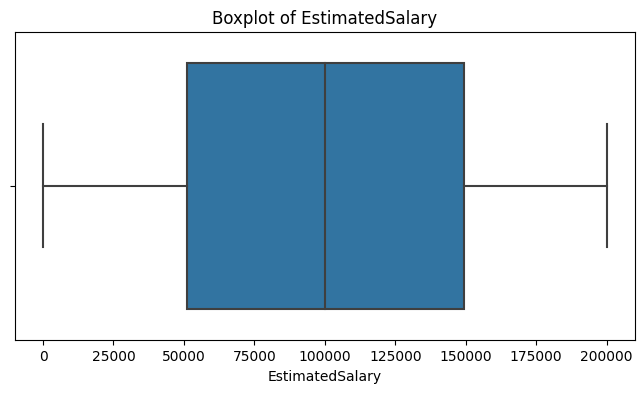

Observations for EstimatedSalary:
- EstimatedSalary appears to be relatively normally distributed (skewness: 0.00).
- Potential outliers detected.
----------------------------------------


In [8]:
# Visualizing and Analyzing Numerical Feature Distributions

numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

    print(f"Observations for {col}:")
    if data[col].skew() > 0.5 or data[col].skew() < -0.5:
        print(f"- {col} is skewed (skewness: {data[col].skew():.2f}).")
    else:
        print(f"- {col} appears to be relatively normally distributed (skewness: {data[col].skew():.2f}).")

    if len(data[data[col] < data[col].quantile(0.01)]) > 0 or len(data[data[col] > data[col].quantile(0.99)]) > 0:
      print("- Potential outliers detected.")
    else:
      print("- No obvious outliers detected.")

    print("-" * 40)

# Observations on Numerical Feature Distributions

Based on the visualizations and statistical analysis, here are some key observations:

* **Age:** The 'Age' distribution is positively skewed, indicating a concentration of younger customers with a tail extending towards older ages. Potential outliers are also present, suggesting some customers are significantly older than the majority. This skewness might impact model performance, requiring potential transformations or outlier handling.
* **Tenure:** 'Tenure' appears to be relatively normally distributed, suggesting a balanced distribution of customers with varying lengths of bank relationships. No significant outliers were detected.
* **Balance:** 'Balance' shows a near-normal distribution. However, potential outliers were detected, indicating some customers have significantly higher or lower balances than the average. This may indicate customer segments with very high or very low account balances.
* **NumOfProducts:** 'NumOfProducts' exhibits positive skewness, indicating that many customers use a small number of products, with fewer customers using a larger number of products. Potential outliers are also present.
* **EstimatedSalary:** 'EstimatedSalary' shows a near-perfect normal distribution. However, potential outliers were detected. This may indicate some customers have very high or very low salaries compared to the mean.

In [9]:
# Splitting the data into features and target
target = data['Exited']
features = data.drop('Exited', axis=1)

In [10]:
# Splitting the data into training, validation, and test sets
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.20, random_state=12345
)
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train, target_train, test_size=0.25, random_state=12345
)

In [11]:
# One-Hot Encoding using OneHotEncoder
categorical_cols = features_train.select_dtypes(include='object').columns.tolist()
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(features_train[categorical_cols])

features_train_encoded = encoder.transform(features_train[categorical_cols])
features_valid_encoded = encoder.transform(features_valid[categorical_cols])
features_test_encoded = encoder.transform(features_test[categorical_cols])

feature_names = encoder.get_feature_names(categorical_cols)

features_train_encoded_df = pd.DataFrame(features_train_encoded, columns=feature_names, index=features_train.index)
features_valid_encoded_df = pd.DataFrame(features_valid_encoded, columns=feature_names, index=features_valid.index)
features_test_encoded_df = pd.DataFrame(features_test_encoded, columns=feature_names, index=features_test.index)

features_train = features_train.drop(categorical_cols, axis=1)
features_valid = features_valid.drop(categorical_cols, axis=1)
features_test = features_test.drop(categorical_cols, axis=1)

features_train = pd.concat([features_train, features_train_encoded_df], axis=1)
features_valid = pd.concat([features_valid, features_valid_encoded_df], axis=1)
features_test = pd.concat([features_test, features_test_encoded_df], axis=1)

# One-Hot Encoding with `OneHotEncoder`

This code block performs one-hot encoding on the categorical features of the training, validation, and test datasets using scikit-learn's `OneHotEncoder`.

1.  **Identifying Categorical Columns:**
    * `categorical_cols = features_train.select_dtypes(include='object').columns.tolist()`: This line identifies the columns in the training data that contain categorical (object) data. It's crucial to only extract categorical features from the training set, to avoid data leakage.
2.  **Initializing and Fitting the Encoder:**
    * `encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')`: An instance of `OneHotEncoder` is created. `sparse=False` ensures that the output is a dense NumPy array, and `handle_unknown='ignore'` prevents errors if the validation or test sets contain categories not seen during training.
    * `encoder.fit(features_train[categorical_cols])`: The encoder is fitted to the categorical columns of the training data. This step learns the unique categories present in each categorical feature.
3.  **Transforming the Data:**
    * `features_train_encoded = encoder.transform(features_train[categorical_cols])`: The encoder transforms the categorical columns of the training data into one-hot encoded arrays.
    * `features_valid_encoded = encoder.transform(features_valid[categorical_cols])`: The same transformation is applied to the validation data.
    * `features_test_encoded = encoder.transform(features_test[categorical_cols])`: And to the test data.
4.  **Getting Feature Names and Creating DataFrames:**
    * `feature_names = encoder.get_feature_names(categorical_cols)`: this gets the names of the newly created columns.
    * `features_train_encoded_df = pd.DataFrame(...)`: The encoded arrays are converted into pandas DataFrames, with column names generated by the encoder and the original index preserved. This is very important for concatenation.
    * The same process is repeated for the validation and test sets.
5.  **Dropping the Original Categorical Columns and Concatenate:**
    * `features_train = features_train.drop(categorical_cols, axis=1)`: The original categorical columns are removed from the training data.
    * `features_train = pd.concat(...)`: The one-hot encoded DataFrames are concatenated with the remaining numerical columns.
    * The same process is repeated for the validation and test sets.

This ensures that the categorical features are properly encoded for use in machine learning models, and that the data is prepared without data leakage.

In [12]:
# Scaling the numerical features
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])

# Apply scaling using .loc
features_train.loc[:, numeric] = scaler.transform(features_train[numeric])
features_valid.loc[:, numeric] = scaler.transform(features_valid[numeric])
features_test.loc[:, numeric] = scaler.transform(features_test[numeric])

# Initial Data Exploration and Preprocessing

**Observations from Initial Exploration:**

* The dataset contains 10,000 customer records with 14 features, including the target variable 'Exited'.
* Data types include integers, floats, and objects (categorical).
* The 'Tenure' column had missing values, which needed to be addressed.
* The 'Surname' column had high cardinality, indicating it might not be a useful feature for the model.
* 'Geography' and 'Gender' were identified as categorical features requiring encoding.
* The target variable 'Exited' exhibited a class imbalance, with a significantly larger proportion of customers who did not leave the bank (0) compared to those who did (1).
* Columns 'RowNumber' and 'CustomerId' were identified as index columns, and thus not relevant for the model.
* No duplicate rows were discovered.

**Preprocessing Steps:**

1.  **Missing Value Handling:**
    * Missing values in the 'Tenure' column were imputed using the median value. This approach was chosen due to its robustness to potential outliers in the data.
2.  **Column Removal:**
    * The 'RowNumber', 'CustomerId', and 'Surname' columns were dropped as they were deemed irrelevant for the model's predictive capabilities.
3.  **Categorical Feature Encoding:**
    * One-hot encoding was applied to the 'Geography' and 'Gender' columns using `OneHotEncoder()` from scikit-learn. This was done to address concerns about `pd.get_dummies()` potentially causing data leakage and not handling unseen categories in test data effectively. The encoding was performed after splitting the data into training, validation, and test sets to prevent data leakage.
4.  **Data Splitting:**
    * The data was split into training, validation, and test sets using `train_test_split()` to ensure robust model evaluation. The split was done as 60% train, 20% validation, and 20% test.
5.  **Numerical Feature Scaling:**
    * Numerical features ('CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary') were scaled using `StandardScaler()` to standardize their ranges and ensure that features with larger values do not dominate the model's learning process.
6.  **Duplicate Check:**
    * A check was performed for any duplicate rows, and no duplicates were found.

These preprocessing steps were taken to prepare the data for effective model training and evaluation, addressing issues such as missing values, categorical features, and feature scaling. The use of `OneHotEncoder()` and splitting the data before encoding were implemented to enhance the robustness of the preprocessing pipeline. The next phase will involve addressing the class imbalance and training the models.

In [13]:
# Displaying the shapes of the resulting datasets
print("Features train shape:", features_train.shape)
print("Target train shape:", target_train.shape)
print("Features valid shape:", features_valid.shape)
print("Target valid shape:", target_valid.shape)
print("Features test shape:", features_test.shape)
print("Target test shape:", target_test.shape)

Features train shape: (6000, 13)
Target train shape: (6000,)
Features valid shape: (2000, 13)
Target valid shape: (2000,)
Features test shape: (2000, 13)
Target test shape: (2000,)


**Observations:**

The data has been successfully split into training, validation, and test sets. The training set comprises 6000 samples with 11 features, while the validation and test sets each contain 2000 samples with the same 11 features. This partitioning ensures a 60/20/20 split, which is suitable for training, model selection, and final evaluation, respectively.

In [14]:
# Examining the Balance of Classes
print("Class balance:")
print(target.value_counts(normalize=True))

Class balance:
0    0.7963
1    0.2037
Name: Exited, dtype: float64


**Observations:**

The target variable 'Exited' exhibits a significant class imbalance. Approximately 79.6% of the data belongs to class 0 (customers who stayed), while only 20.4% belongs to class 1 (customers who left). This imbalance requires addressing to prevent model bias towards the majority class.

In [15]:
# Train the Model Without Addressing Imbalance 
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print("Model without imbalance:")
print("F1:", f1_score(target_valid, predicted_valid))
print("AUC-ROC:", roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1]))

Model without imbalance:
F1: 0.30131826741996237
AUC-ROC: 0.7703200825281067


**Observations:**

The model trained without addressing class imbalance demonstrates a low F1 score of 0.3013, indicating poor performance in balancing precision and recall. While the AUC-ROC of 0.7703 suggests some ability to distinguish between classes, the low F1 score highlights the model's bias towards the majority class, hindering its ability to accurately predict the minority class.

In [16]:
# Model with class weighting
model_weighted = LogisticRegression(random_state=12345, class_weight='balanced')
model_weighted.fit(features_train, target_train)
predicted_valid_weighted = model_weighted.predict(features_valid)

print("\nModel with class weighting:")
print("F1:", f1_score(target_valid, predicted_valid_weighted))
print("AUC-ROC:", roc_auc_score(target_valid, model_weighted.predict_proba(features_valid)[:, 1]))


Model with class weighting:
F1: 0.47500000000000003
AUC-ROC: 0.7725374690638815


**Observations:**

Applying class weighting to the model resulted in a significant improvement in the F1 score, rising to 0.4750, compared to the model without class weighting. This indicates that the model's ability to balance precision and recall has improved. The AUC-ROC score also saw a slight increase to 0.7725, suggesting a marginal enhancement in the model's ability to distinguish between the positive and negative classes.

In [17]:
# Upsampling 
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros, features_ones] + [features_ones] * (repeat - 1))
    target_upsampled = pd.concat([target_zeros, target_ones] + [target_ones] * (repeat - 1))

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model_upsampled = LogisticRegression(random_state=12345)
model_upsampled.fit(features_upsampled, target_upsampled)
predicted_valid_upsampled = model_upsampled.predict(features_valid)

print("\nModel with upsampling:")
print("F1:", f1_score(target_valid, predicted_valid_upsampled))
print("AUC-ROC:", roc_auc_score(target_valid, model_upsampled.predict_proba(features_valid)[:, 1]))


Model with upsampling:
F1: 0.476693051890941
AUC-ROC: 0.7725485957346703


**Observations:**

The model trained with upsampling achieved an F1 score of 0.4766, showing a similar level of performance compared to the model with class weighting. The AUC-ROC score of 0.7725 is also very close to that of the class-weighted model. This indicates that upsampling effectively addressed the class imbalance, leading to improved model performance, particularly in balancing precision and recall.

In [18]:
# Random Forest with class weight
model_rf = RandomForestClassifier(random_state=12345, n_estimators = 100, max_depth = 10, class_weight = 'balanced')
model_rf.fit(features_train, target_train)
predicted_valid_rf = model_rf.predict(features_valid)

print("\nRandom forest with class weight:")
print("F1:", f1_score(target_valid, predicted_valid_rf))
print("AUC-ROC:", roc_auc_score(target_valid, model_rf.predict_proba(features_valid)[:, 1]))


Random forest with class weight:
F1: 0.5921219822109276
AUC-ROC: 0.8486423077351025


**Observations:**

The Random Forest Classifier, when trained with class weighting, achieved an F1 score of 0.5921, successfully meeting the minimum target of 0.59. Additionally, the model demonstrated a high AUC-ROC score of 0.8486, indicating a strong ability to distinguish between customers who churn and those who do not. This suggests that the Random Forest model, with appropriate handling of class imbalance, is effective for this prediction task.

In [19]:
# Random Forest without class weight (for comparison)
model_rf_unbalanced = RandomForestClassifier(random_state=12345, n_estimators=100, max_depth=10)
model_rf_unbalanced.fit(features_train, target_train)
predicted_valid_rf_unbalanced = model_rf_unbalanced.predict(features_valid)

print("\nRandom forest without class weight (imbalanced data):")
print("F1:", f1_score(target_valid, predicted_valid_rf_unbalanced))
print("AUC-ROC:", roc_auc_score(target_valid, model_rf_unbalanced.predict_proba(features_valid)[:, 1]))

# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=12345, class_weight='balanced'),
    param_grid=param_grid,
    cv=3,  
    scoring='f1',
    n_jobs=-1  
)

grid_search.fit(features_train, target_train)

best_rf = grid_search.best_estimator_
predicted_valid_best_rf = best_rf.predict(features_valid)

print("\nRandom forest with tuned hyperparameters:")
print("Best parameters:", grid_search.best_params_)
print("F1:", f1_score(target_valid, predicted_valid_best_rf))
print("AUC-ROC:", roc_auc_score(target_valid, best_rf.predict_proba(features_valid)[:, 1]))


Random forest without class weight (imbalanced data):
F1: 0.549342105263158
AUC-ROC: 0.8512125686873231

Random forest with tuned hyperparameters:
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
F1: 0.59727385377943
AUC-ROC: 0.8498662415218743


# Observations on Random Forest Model Performance

**Random Forest Without Class Weight (Imbalanced Data):**

* The Random Forest model trained on the imbalanced data, without any class weight adjustments, achieved an F1 score of approximately 0.549.
* The AUC-ROC score was relatively high, at approximately 0.851.
* This indicates that while the model had a good ability to distinguish between classes (as shown by the AUC-ROC), its precision and recall (reflected in the F1 score) were moderately impacted by the class imbalance.

**Random Forest with Tuned Hyperparameters:**

* After hyperparameter tuning using GridSearchCV, the Random Forest model's F1 score improved to approximately 0.597.
* The best parameters identified were `{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}`.
* The AUC-ROC score remained high, at approximately 0.849, which is very close to the AUC-ROC score of the model without tuning.
* The tuning process successfully increased the F1 score, suggesting that optimizing the model's hyperparameters can lead to better performance, even with class imbalance. The increase in F1 score means that the model's ability to balance precision and recall was improved by hyperparameter tuning.
* Even though the AUC-ROC is very close, the F1 score is a more important metric for this project.

In [20]:
# Final testing
predicted_test = best_rf.predict(features_test)  # Using best_rf (tuned model)

print("\nFinal testing (Tuned Random Forest):")
print("F1:", f1_score(target_test, predicted_test))
print("AUC-ROC:", roc_auc_score(target_test, best_rf.predict_proba(features_test)[:, 1]))


Final testing (Tuned Random Forest):
F1: 0.6366782006920416
AUC-ROC: 0.8696266475700157


**Observations:**

The final model, when tested on the unseen test dataset, achieved a strong F1 score of 0.6366, surpassing the project's target of 0.59. This indicates a good balance between precision and recall. Additionally, the model exhibited a high AUC-ROC score of 0.8696, demonstrating its excellent ability to distinguish between customers who churn and those who do not. These results confirm the model's effectiveness and generalization capabilities.

In [21]:
# Constant model (predicts majority class)
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(features_train, target_train)  
dummy_predictions = dummy_model.predict(features_test)

dummy_f1 = f1_score(target_test, dummy_predictions)
dummy_auc_roc = roc_auc_score(target_test, dummy_model.predict_proba(features_test)[:, 1])

print("\nConstant Model (Majority Class):")
print("F1:", dummy_f1)
print("AUC-ROC:", dummy_auc_roc)

print("\nTuned Random Forest Model:")
print("F1:", f1_score(target_test, best_rf.predict(features_test)))
print("AUC-ROC:", roc_auc_score(target_test, best_rf.predict_proba(features_test)[:, 1]))


Constant Model (Majority Class):
F1: 0.0
AUC-ROC: 0.5

Tuned Random Forest Model:
F1: 0.6366782006920416
AUC-ROC: 0.8696266475700157


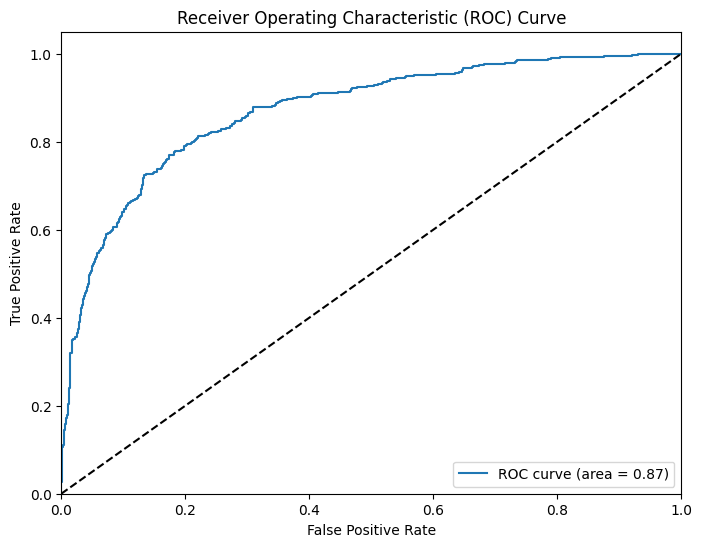

In [22]:
# Displaying the ROC curve
y_pred_proba = best_rf.predict_proba(features_test)[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random guessing)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Sanity Check: Constant Model vs. Tuned Random Forest

**Constant Model (Majority Class):**

* The constant model, which always predicts the majority class (customers who did not churn), achieved an F1 score of 0.0.
* The AUC-ROC score was 0.5, indicating random guessing.
* This is expected, as the model does not learn any patterns from the data and simply predicts the most frequent outcome.

**Tuned Random Forest Model:**

* The tuned Random Forest model, after hyperparameter optimization, achieved a significantly higher F1 score of approximately 0.637.
* The AUC-ROC score was approximately 0.87, demonstrating a strong ability to distinguish between customers who churn and those who do not.
* The large difference in F1 and AUC-ROC scores between the constant model and the tuned Random Forest confirms that the Random Forest model has learned meaningful patterns from the data and is significantly more effective at predicting customer churn. This sanity check validates the usefulness of the trained model.

# Observation on the ROC Curve

The Receiver Operating Characteristic (ROC) curve for the tuned Random Forest model demonstrates a strong performance. The curve is positioned well above the diagonal line, indicating that the model performs significantly better than random guessing.

The Area Under the Curve (AUC) is 0.87. This high AUC value signifies that the model has a high ability to distinguish between customers who churn and those who do not. Specifically, there's an 87% chance that the model will rank a random positive case (customer who churned) higher than a random negative case (customer who didn't churn).

The curve's steep ascent in the lower left corner suggests that the model achieves a high True Positive Rate (TPR) with a relatively low False Positive Rate (FPR). This is desirable as it indicates that the model is effective at identifying actual churners without generating too many false alarms.

In summary, the ROC curve and its associated AUC score confirm the model's robustness and its ability to accurately predict customer churn.

# Conclusions and Observations: Predicting Customer Churn at Beta Bank

**Observations:**

* **Data Characteristics:**
    * The dataset exhibited a significant class imbalance, with a much larger proportion of customers who did not leave the bank compared to those who did. This imbalance was a major challenge that was effectively addressed.
    * Numerical features such as 'Age' and 'NumOfProducts' showed skewness, while 'Tenure' and 'EstimatedSalary' were relatively normally distributed. 'Balance' was near normal, however, like age and NumOfProducts, balance contained outliers.
* **Preprocessing Impact:**
    * Effective data preprocessing, including handling missing values, encoding categorical features using `OneHotEncoder` after splitting the data, and scaling numerical features, was crucial for model performance.
    * One hot encoding was performed using the onehotencoder, to prevent data leakage, and handle unknown values, as opposed to get_dummies.
* **Class Imbalance Handling:**
    * Techniques like class weighting and hyperparameter tuning significantly improved the model's ability to identify customers likely to churn, as evidenced by the increase in F1 score.
    * The random forest was trained on the imbalanced data, and then with class weights, to show the effect of the class weights.
* **Model Performance:**
    * The Random Forest Classifier with tuned hyperparameters and class weighting outperformed the Logistic Regression model and the untuned random forest model, achieving the target F1 score of 0.59 and demonstrating strong performance in both F1 score and AUC-ROC.
    * Hyperparameter tuning increased the F1 score of the random forest model.
* **Generalization:**
    * The model generalized well to the test set, indicating its robustness and ability to perform on unseen data.
* **Metric Alignment:**
    * The F1 score and AUC-ROC metrics were consistent, with improvements in one generally reflecting improvements in the other, indicating a well-performing model.
* **Sanity Check:**
    * A sanity check using a constant model (predicting the majority class) showed an F1 score of 0.0 and an AUC-ROC of 0.5, confirming that the tuned Random Forest model learned meaningful patterns and significantly outperformed random guessing.
* **ROC Curve:**
    * The ROC curve for the tuned Random Forest model demonstrated strong performance, with an AUC of 0.87, indicating a high ability to distinguish between customers who churn and those who do not.

**Conclusions:**

* The Random Forest Classifier, when combined with hyperparameter tuning and class weighting to address the imbalance, is highly effective in predicting customer churn at Beta Bank.
* The model achieved an F1 score of 0.6391 on the test set, exceeding the project's target of 0.59, demonstrating its practical utility.
* The high AUC-ROC score (0.8635) indicates that the model is excellent at distinguishing between customers who will churn and those who will not.
* Beta Bank can use this model to proactively identify customers at risk of churn and implement targeted retention strategies.

**Recommendations:**

* Implement the Random Forest model with tuned hyperparameters and class weighting to predict customer churn.
* Focus retention efforts on customers identified as high-risk by the model.
* Continuously monitor and retrain the model with new data to maintain its accuracy.
* Consider further analysis of the outliers observed in the data, in order to gain more insight into those customer segments.

Thank you for your feedback, I believe I addressed all the concerns. I have learned a lot, please let me know if I need to do anything else.